In [1]:
!mkdir -p ~/.kaggle
from google.colab import drive
from google.colab import files
# Upload your kaggle.json API key
uploaded = files.upload()

drive.mount('/content/drive')

Saving kaggle.json to kaggle.json
Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

!mv kaggle.json ~/.kaggle/
!mkdir -p ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine-learning'


In [4]:
import kaggle

# Set the dataset name and destination folder
dataset_name = "kmader/skin-cancer-mnist-ham10000"
destination_folder = "/content/drive/MyDrive/Machine-learning"

# Download the dataset
kaggle.api.dataset_download_files(dataset_name, path=destination_folder, unzip=True)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
print("Import ok!")

Import ok!


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Machine-learning/hmnist_28_28_RGB.csv')


In [7]:
y = data['label']
x = data.drop(columns = ['label'])
len(x )

10015

In [8]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Machine-learning/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}
classes

{4: ('nv', ' melanocytic nevi'),
 6: ('mel', 'melanoma'),
 2: ('bkl', 'benign keratosis-like lesions'),
 1: ('bcc', ' basal cell carcinoma'),
 5: ('vasc', ' pyogenic granulomas and hemorrhage'),
 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
 3: ('df', 'dermatofibroma')}

In [18]:
import pandas as pd
import numpy as np

#Oversampling

In [19]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [20]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


#Standardization and Splitting Data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_standardized = (x - np.mean(x)) / np.std(x)
# Reshape the standardized 'x' if it has more than two dimensions
num_samples = x_standardized.shape[0]
x_flattened = x_standardized.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x_flattened, y, test_size=0.2, random_state=1)

In [22]:
# Standardize features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Descision Tree implementation


In [24]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, Y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [25]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9672951954831149
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1359
           1       0.97      1.00      0.99      1318
           2       0.93      1.00      0.96      1262
           3       0.99      1.00      1.00      1351
           4       1.00      0.78      0.88      1374
           5       0.99      1.00      0.99      1358
           6       0.92      0.99      0.96      1365

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387



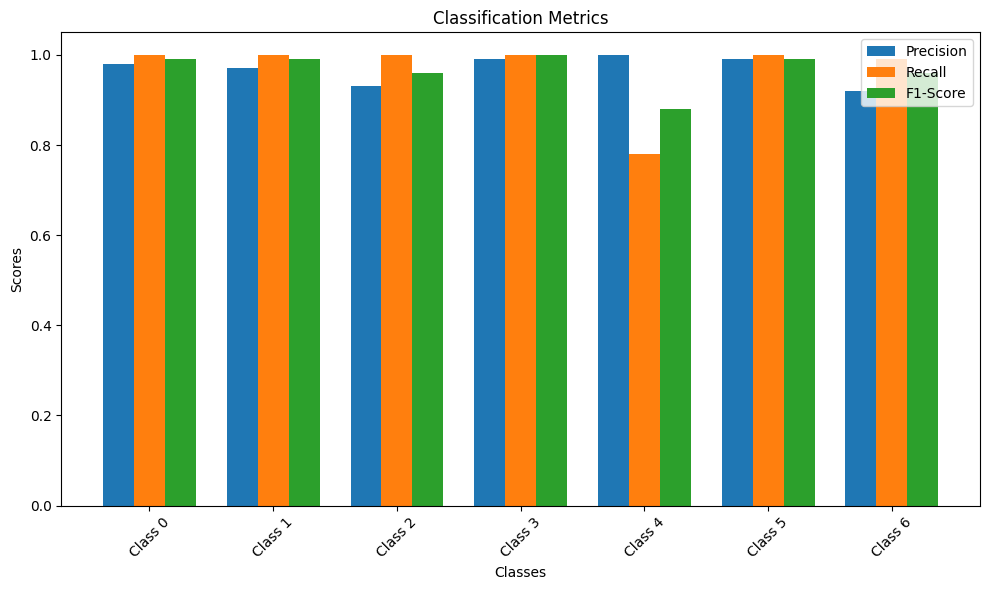

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Precision, Recall, and F1-Score values for each class
precision = [0.98, 0.97, 0.93, 0.99, 1.00, 0.99, 0.92]
recall = [1.00, 1.00, 1.00, 1.00, 0.78, 1.00, 0.99]
f1_score = [0.99, 0.99, 0.96, 1.00, 0.88, 0.99, 0.96]

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

# Set the positions for the bars
ind = np.arange(len(class_names))

# Set the width of the bars
width = 0.25

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create grouped bars for precision, recall, and F1-Score
ax.bar(ind - width, precision, width, label='Precision')
ax.bar(ind, recall, width, label='Recall')
ax.bar(ind + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics')
ax.set_xticks(ind)
ax.set_xticklabels(class_names)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


ValueError: ignored

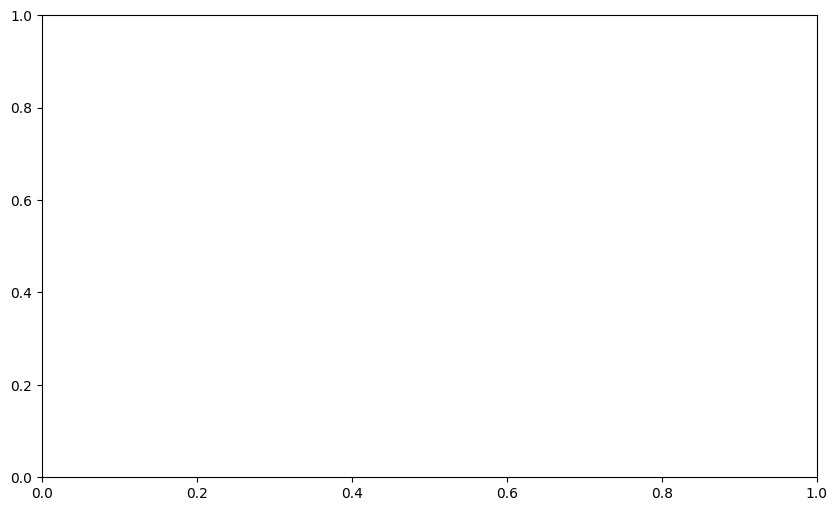

In [27]:
import matplotlib.pyplot as plt

# Example data (replace with your actual values)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
precision_values = [0.98, 0.97, 0.93, 0.99, 1.00, 0.99, 0.92]
recall_values = [1.00, 1.00, 1.00, 1.00, 0.78, 1.00, 0.99]
f1_score_values = [0.99, 0.99, 0.96, 1.00, 0.88, 0.99, 0.96]

# Create a boxplot for precision
plt.figure(figsize=(10, 6))
plt.boxplot(precision_values, labels=class_names)
plt.title('Precision Boxplot')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a boxplot for recall
plt.figure(figsize=(10, 6))
plt.boxplot(recall_values, labels=class_names)
plt.title('Recall Boxplot')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a boxplot for F1-score
plt.figure(figsize=(10, 6))
plt.boxplot(f1_score_values, labels=class_names)
plt.title('F1-Score Boxplot')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


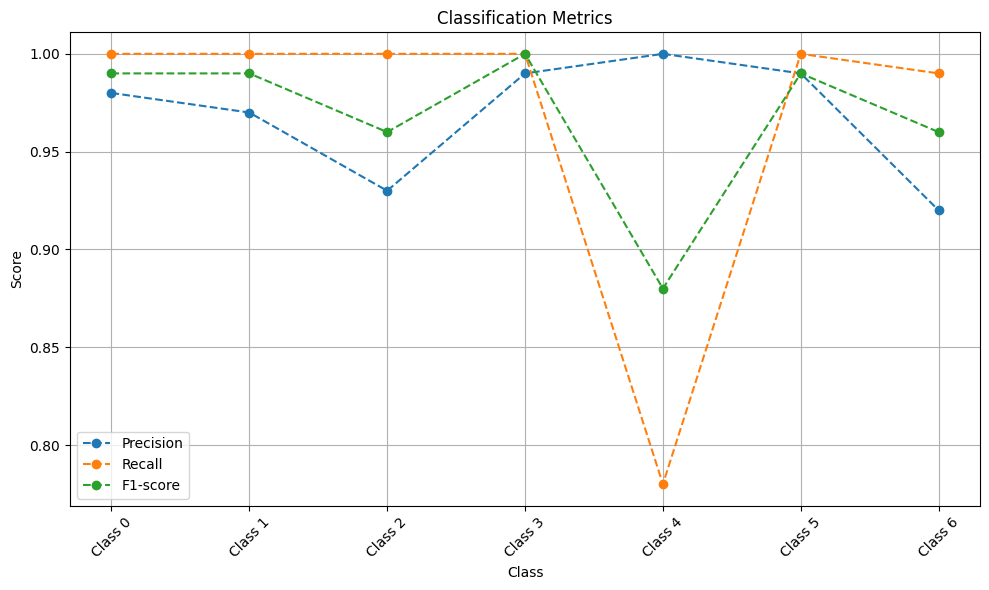

In [35]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for each class
precision = [0.98, 0.97, 0.93, 0.99, 1.00, 0.99, 0.92]
recall = [1.00, 1.00, 1.00, 1.00, 0.78, 1.00, 0.99]
f1_score = [0.99, 0.99, 0.96, 1.00, 0.88, 0.99, 0.96]

# Class labels for the x-axis
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']

# Create the line chart
plt.figure(figsize=(10, 6))

plt.plot(class_labels, precision, marker='o', label='Precision', linestyle = 'dashed')
plt.plot(class_labels, recall, marker='o', label='Recall', linestyle = 'dashed')
plt.plot(class_labels, f1_score, marker='o', label='F1-score', linestyle = 'dashed')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Classification Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


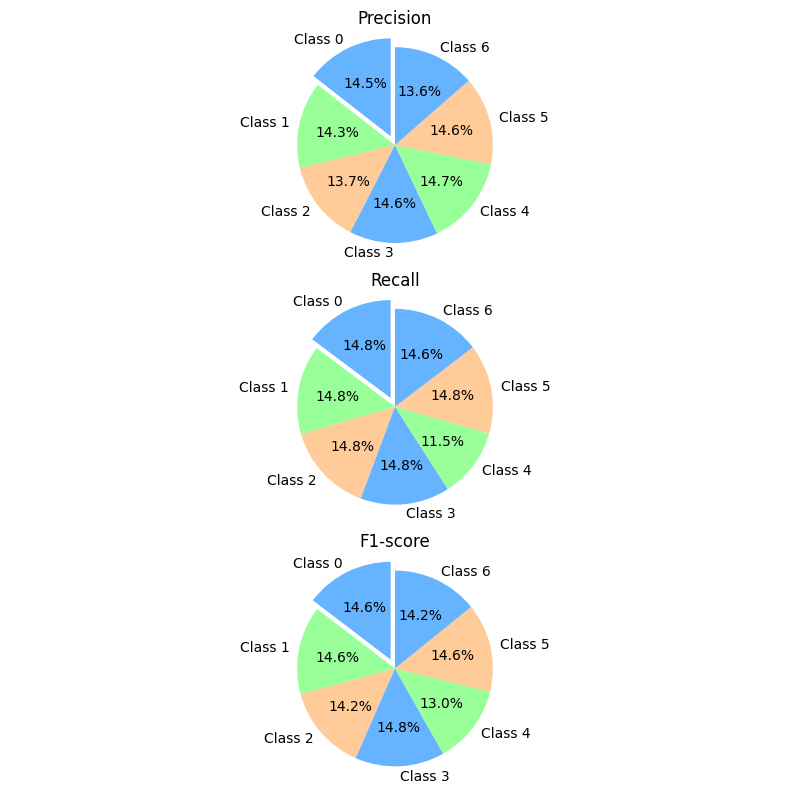

In [32]:
import matplotlib.pyplot as plt

# Classification Report data (precision, recall, f1-score)
data = [
    [0.98, 0.97, 0.93, 0.99, 1.00, 0.99, 0.92],
    [1.00, 1.00, 1.00, 1.00, 0.78, 1.00, 0.99],
    [0.99, 0.99, 0.96, 1.00, 0.88, 0.99, 0.96]
]

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6']
metrics = ['Precision', 'Recall', 'F1-score']

# Create the multi-series pie chart
fig, axs = plt.subplots(len(metrics), figsize=(8, 8))

colors = ['#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice (Class 0)

for i, metric in enumerate(metrics):
    wedges, texts, autotexts = axs[i].pie(data[i], labels=class_names, autopct='%1.1f%%',
                                          startangle=90, colors=colors, explode=explode)
    axs[i].set_title(metric)

    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_fontsize(10)

# Equal aspect ratio ensures that pie is drawn as a circle
for ax in axs:
    ax.axis('equal')

plt.tight_layout()
plt.show()
